# Plotting Clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import geopandas as gpd

In [2]:
clusters = pd.read_csv('../data/clusters/clusters.csv')

In [3]:
clusters.loc[clusters['country'] == 'United States', 'country'] = 'United States of America'
clusters.loc[clusters['country'] == 'B-S-J-Z (China)', 'country'] = 'China'
clusters.loc[clusters['country'] == 'Chinese Taipei', 'country'] = 'Taiwan'
clusters.loc[clusters['country'] == 'Slovak Republic', 'country'] = 'Slovakia'
clusters.loc[clusters['country'] == 'Brunei Darussalam', 'country'] = 'Brunei'

In [4]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
world = world.merge(clusters, how='left', left_on='NAME', right_on='country')
world = world[~world['SOV_A3'].isin(['ATA', 'GRL', 'ATF'])]

/var/folders/0x/klqdyhpj427dvg81kxzyfcvm0000gn/T/ipykernel_96904/2384936365.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', n_clusters).colors)


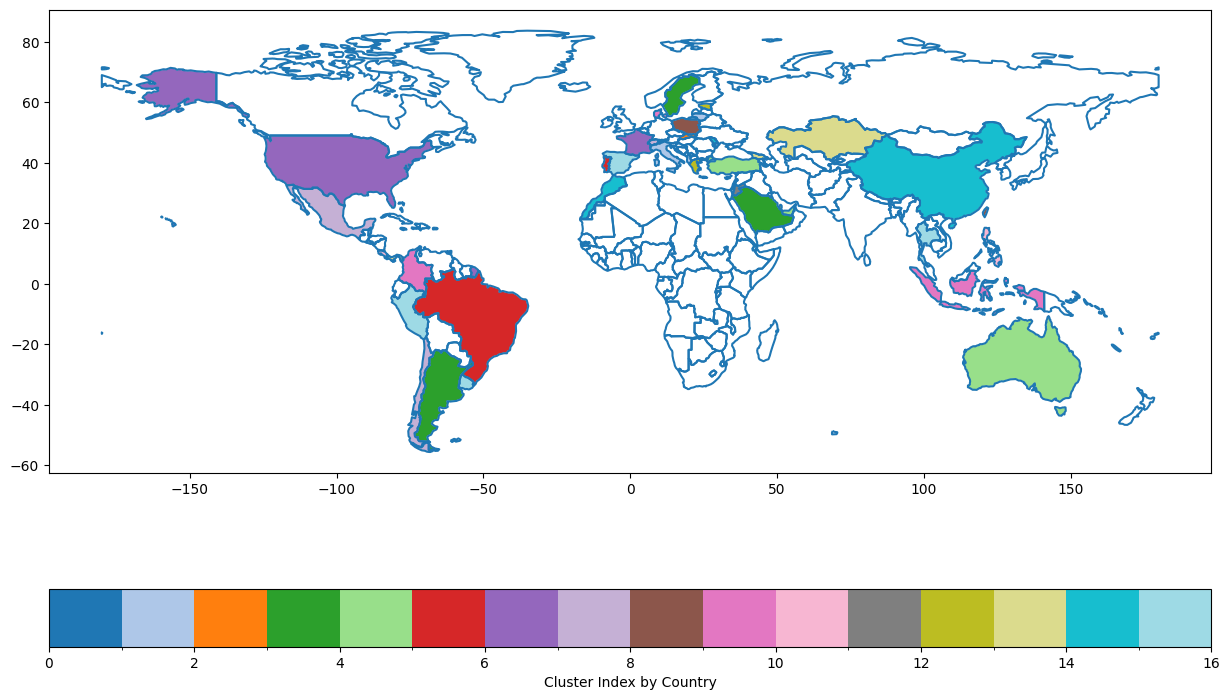

In [5]:
n_clusters = len(world['cluster'].dropna().unique())

cmap = ListedColormap(plt.cm.get_cmap('tab20', n_clusters).colors)
norm = BoundaryNorm(boundaries=range(n_clusters + 1), ncolors=n_clusters)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(column='cluster',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Cluster Index by Country",
                       'orientation': "horizontal"},
            cmap=cmap,
            norm=norm,
            edgecolors='whitesmoke',
)

plt.savefig("map.png")